# Technological Devices Sales Analysis

#### Utilizes Python Pandas & Matplotlib to analyze thousands of electronics store purchases

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
import os

### Merging 12 months of sales data into a single file

In [12]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_data.csv", index = False) # index = False gets rid of indexes

### Read In updated dataframe

In [13]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Clean Data

##### Drop NaN Rows

In [60]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all') # Drop rows with NaN

##### Find 'Or' and Remove

In [61]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

##### Convert Columns to Desired Data Type

In [62]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # to integer 
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # to float

### Augment Data with Additional Columns

##### Add Month Column

In [67]:
all_data['Month'] = all_data['Order Date'].str[0:2] #0:2 grabs the first 2 characters
all_data['Month'] == all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


##### Add Sales Column

In [65]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

##### Add City Column

In [68]:
def get_city(address):
    return address.split(',')[1] # split by comma and grab the first index 

def get_state(address):
    return address.split(',')[2].split(' ')[1] # split by comma and grab the second index then split again by space and grab the first index

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


### Best Month for Sales & Monthly Earnings

In [79]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1.811768e+06,1.822257e+06
02,13449,2.188885e+06,2.202022e+06
03,17005,2.791208e+06,2.807100e+06
04,20558,3.367671e+06,3.390670e+06
05,18667,3.135125e+06,3.152607e+06
06,15253,2.562026e+06,2.577802e+06
07,16072,2.632540e+06,2.647776e+06
08,13448,2.230345e+06,2.244468e+06
09,13109,2.084992e+06,2.097560e+06


Text(0.5, 0, 'Month')

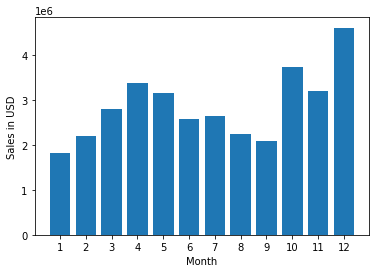

In [80]:
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')
plt.xlabel('Month')

###### December was the best month for sales with 29114 products ordered by customers earning four million six hundred and thirteen thousand worth of sales that month. On the other hand, January was the worse month with 10903 products ordered, earning one million eight hundred and twenty two dollars worth of sales 

### City with Highest Number of Sales

In [70]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06
Austin (TX),11153,1.809874e+06,1.819582e+06
Boston (MA),22528,3.637410e+06,3.661642e+06
Dallas (TX),16730,2.752628e+06,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,5.452571e+06
New York City (NY),27932,4.635371e+06,4.664317e+06
Portland (ME),2750,4.471893e+05,4.497583e+05
Portland (OR),11303,1.860558e+06,1.870732e+06
San Francisco (CA),50239,8.211462e+06,8.262204e+06


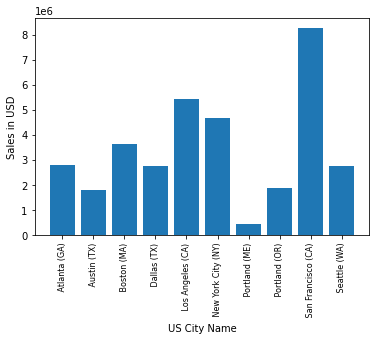

In [75]:
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities, rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD')
plt.xlabel('US City Name')
plt.show()

###### San Francisco is the best performing city in electronic sales and Portland (ME) has the lowest electronic sales value

### Time to Display Advertisement to Maximize Likelihood of Customer's Purchasing Product

In [86]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


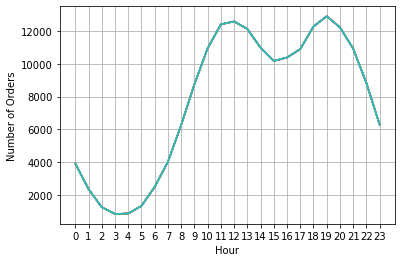

In [93]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

###### Purchase peaks occurs twice, first time at approximately 11 am and the second peak occurs at 7 pm therefore advertisments for the products should be placed just before the peak inorder to raise sales.

### Products that are Often Sold Together

In [107]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

<ipython-input-107-87b8b7db9ab8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
...,...,...
2297,297847,"iPhone, Lightning Charging Cable"
2345,297894,"USB-C Charging Cable, AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable, 27in FHD Monitor"
2398,297945,"Vareebadd Phone, USB-C Charging Cable, Bose So..."


In [111]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(', ')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


###### iPhone and Lightning Charging Cable is often purchased together

### Product that is sold the most

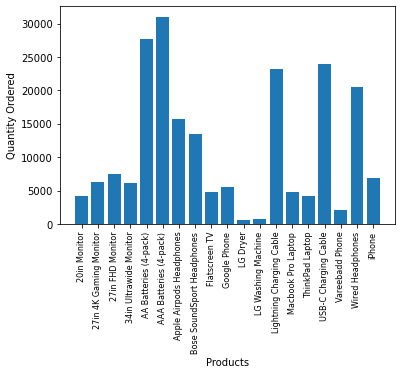

In [118]:
product_group = all_data.groupby('Product')
quantity_order = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_order)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation='vertical', size = 8)
plt.show()

<ipython-input-130-755f2377aac6>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size = 8)


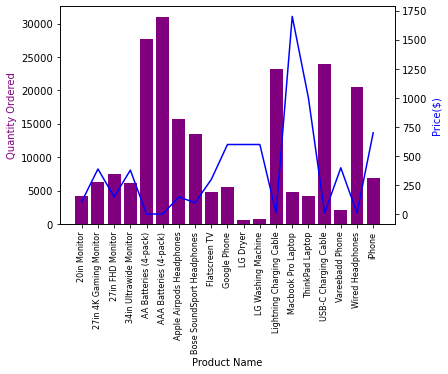

In [130]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_order, color = 'purple')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='purple')
ax2.set_ylabel('Price($)', color = 'b')
ax1.set_xticklabels(products, rotation='vertical', size = 8)

plt.show()

###### AAA Batteries and AA Batteries and USB-C Charging Cable are the top three selling items and I assume it would be because all of these products are cheap and is required often inorder to function electronic devices. This means that once the price increases the demands for those electronic devices tends to decrease.